In [3]:
import min_heap
import random

class DirectedWeightedGraph:

    def __init__(self):
        self.adj = {}
        self.weights = {}

    def are_connected(self, node1, node2):
        for neighbour in self.adj[node1]:
            if neighbour == node2:
                return True
        return False

    def adjacent_nodes(self, node):
        return self.adj[node]

    def add_node(self, node):
        self.adj[node] = []

    def add_edge(self, node1, node2, weight):
        if node2 not in self.adj[node1]:
            self.adj[node1].append(node2)
        self.weights[(node1, node2)] = weight

    def w(self, node1, node2):
        if self.are_connected(node1, node2):
            return self.weights[(node1, node2)]

    def number_of_nodes(self):
        return len(self.adj)


def dijkstra(G, source):
    pred = {} #Predecessor dictionary. Isn't returned, but here for your understanding
    dist = {} #Distance dictionary
    Q = min_heap.MinHeap([])
    nodes = list(G.adj.keys())

    #Initialize priority queue/heap and distances
    for node in nodes:
        Q.insert(min_heap.Element(node, float("inf")))
        dist[node] = float("inf")
    Q.decrease_key(source, 0)

    #Meat of the algorithm
    while not Q.is_empty():
        current_element = Q.extract_min()
        current_node = current_element.value
        dist[current_node] = current_element.key
        for neighbour in G.adj[current_node]:
            if dist[current_node] + G.w(current_node, neighbour) < dist[neighbour]:
                Q.decrease_key(neighbour, dist[current_node] + G.w(current_node, neighbour))
                dist[neighbour] = dist[current_node] + G.w(current_node, neighbour)
                pred[neighbour] = current_node
    return dist


def bellman_ford(G, source):
    pred = {} #Predecessor dictionary. Isn't returned, but here for your understanding
    dist = {} #Distance dictionary
    nodes = list(G.adj.keys())

    #Initialize distances
    for node in nodes:
        dist[node] = float("inf")
    dist[source] = 0

    #Meat of the algorithm
    for _ in range(G.number_of_nodes()):
        for node in nodes:
            for neighbour in G.adj[node]:
                if dist[neighbour] > dist[node] + G.w(node, neighbour):
                    dist[neighbour] = dist[node] + G.w(node, neighbour)
                    pred[neighbour] = node
    return dist


def total_dist(dist):
    total = 0
    for key in dist.keys():
        total += dist[key]
    return total

def create_random_complete_graph(x,y):
    G = DirectedWeightedGraph()
    for i in range(x):
        G.add_node(i)
    for i in range(x):
        for j in range(x):
            if i != j:
                G.add_edge(i, j, random.randint(1, y))
    return G


#Assumes G represents its nodes as integers 0,1,...,(n-1)
def mystery(G):
    n = G.number_of_nodes()
    d = init_d(G)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if d[i][j] > d[i][k] + d[k][j]: 
                    d[i][j] = d[i][k] + d[k][j]
    return d

def init_d(G):
    n = G.number_of_nodes()
    d = [[float("inf") for j in range(n)] for i in range(n)]
    for i in range(n):
        for j in range(n):
            if G.are_connected(i, j):
                d[i][j] = G.w(i, j)
        d[i][i] = 0
    return d

def dijkstra_approx(G, source, k):
    pred = {}
    dist = {}
    relax = {}
    Q = min_heap.MinHeap([])
    nodes = list(G.adj.keys())
    for node in nodes:
        Q.insert(min_heap.Element(node, float("inf")))
        dist[node] = float("inf")
        relax[node] = k
    Q.decrease_key(source, 0)
    relax[source] = relax[source] - 1
    while not Q.is_empty():
        current_element = Q.extract_min()
        current_node = current_element.value
        dist[current_node] = current_element.key
        for neighbour in G.adj[current_node]:
            if dist[current_node] + G.w(current_node, neighbour) < dist[neighbour]:
                if relax[neighbour] > 0:
                    Q.decrease_key(neighbour, dist[current_node] + G.w(current_node, neighbour))
                    relax[neighbour] = relax[neighbour] - 1 
                    dist[neighbour] = dist[current_node] + G.w(current_node, neighbour)
                    pred[neighbour] = current_node
    return dist
    
def bellman_ford_approx(G, source, k):
    pred = {} #Predecessor dictionary. Isn't returned, but here for your understanding
    dist = {} #Distance dictionary
    relax = {}
    nodes = list(G.adj.keys())

    #Initialize distances
    for node in nodes:
        dist[node] = float("inf")
        relax[node] = k
    dist[source] = 0
    relax[source] = relax[source] - 1
    #Meat of the algorithm
    for _ in range(G.number_of_nodes()):
        for node in nodes:
            for neighbour in G.adj[node]:
                if dist[neighbour] > dist[node] + G.w(node, neighbour) and relax[neighbour] > 0:
                    dist[neighbour] = dist[node] + G.w(node, neighbour)
                    relax[neighbour] = relax[neighbour] - 1 
                    pred[neighbour] = node
    return dist

def a_star(G, s, d, h):
    pred = {} #Predecessor dictionary. Isn't returned, but here for your understanding
    dist = {} #Distance dictionary
    Q = min_heap.MinHeap([])
    nodes = list(G.adj.keys())
    for node in nodes:
        Q.insert(min_heap.Element(node, float("inf")))
        dist[node] = float("inf")
    Q.decrease_key(s, h[s])   
    while not Q.is_empty():
        current_element = Q.extract_min()
        if current_element == d:
            break
        current_node = current_element.value
        dist[current_node] = current_element.key - h[current_node]
        for neighbour in G.adj[current_node]:
            if dist[current_node] + G.w(current_node, neighbour) < dist[neighbour]:
                Q.decrease_key(neighbour, dist[current_node] + G.w(current_node, neighbour) + h[neighbour] )
                dist[neighbour] = dist[current_node] + G.w(current_node, neighbour)
                pred[neighbour] = current_node
    return (pred, dist) 


def path_from_pred(pred,start_node,end_node):
    path = []
    current_node = end_node
    while current_node != start_node:
        path.append(current_node)
        current_node = pred[current_node]
    path.append(current_node)
    path.reverse()
    return path

# Test
'''
G=DirectedWeightedGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_edge(1,2,5)
G.add_edge(2,3,5)
G.add_edge(3,4,3)
G.add_edge(4,5,3)
G.add_edge(1,5,7)
G.add_edge(5,6,1)
h = {1:2,2:4,3:3,4:2,5:1,6:0}
d=a_star(G,1,6,h)
print(d)
'''

'\nG=DirectedWeightedGraph()\nG.add_node(1)\nG.add_node(2)\nG.add_node(3)\nG.add_node(4)\nG.add_node(5)\nG.add_node(6)\nG.add_edge(1,2,5)\nG.add_edge(2,3,5)\nG.add_edge(3,4,3)\nG.add_edge(4,5,3)\nG.add_edge(1,5,7)\nG.add_edge(5,6,1)\nh = {1:2,2:4,3:3,4:2,5:1,6:0}\nd=a_star(G,1,6,h)\nprint(d)\n'

In [4]:

#create random graph

G = create_random_complete_graph(10, 10)
def random_h(G):
    h = {}
    for node in G.adj.keys():
        h[node] = random.randint(0,10)
        
    h[G.number_of_nodes()-1] = 0
    return h

print(random_h(G))

def zero_h(G):
    h = {}
    for node in G.adj.keys():
        h[node] = 0
    return h

print(zero_h(G))

{0: 4, 1: 2, 2: 9, 3: 9, 4: 4, 5: 4, 6: 3, 7: 6, 8: 9, 9: 0}
{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


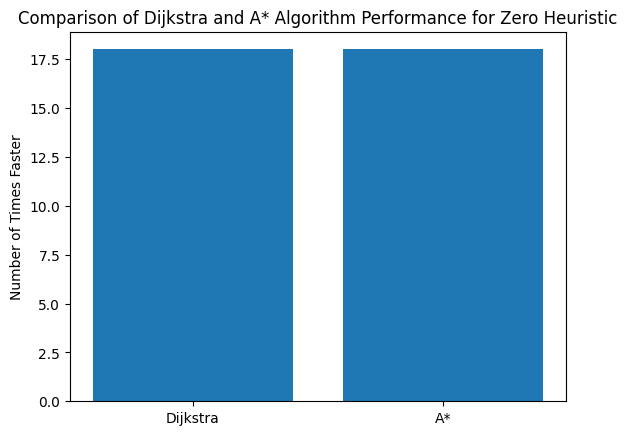

In [5]:
import time
import random
import matplotlib.pyplot as plt
def compare_Zero(G, h):
    dijkstra_time = 0
    a_star_time = 0
    dijkstra_faster_count = 0
    a_star_faster_count = 0
    G = create_random_complete_graph(10, 10)
    h = zero_h(G)
    trials = 0
    while trials < 100:
        try:
            start = time.time()
            dijkstra(G, 0)
            end = time.time()
            dijkstra_time= end-start
            
            start = time.time()
            a_star(G, 0, 9, h)
            end = time.time()
            a_star_time= end-start
            
            
            
            trials += 1
            if a_star_time < dijkstra_time:
                a_star_faster_count += 1
            elif a_star_time == dijkstra_time:
                continue
            else:
                dijkstra_faster_count += 1
        except Exception as e:
            print("A_star error:", e)
            G = create_random_complete_graph(10, 10)
            h = zero_h(G)

    plt.bar(['Dijkstra', 'A*'], [dijkstra_faster_count, a_star_faster_count])
    plt.ylabel('Number of Times Faster')
    plt.title('Comparison of Dijkstra and A* Algorithm Performance for Zero Heuristic')
    plt.show()

compare_Zero(G, random_h(G))

A_star error: 9
A_star error: 9
A_star error: 7
A_star error: 9
A_star error: 5
A_star error: 8
A_star error: 7
A_star error: 2
A_star error: 4
A_star error: 9
A_star error: 9
A_star error: 9


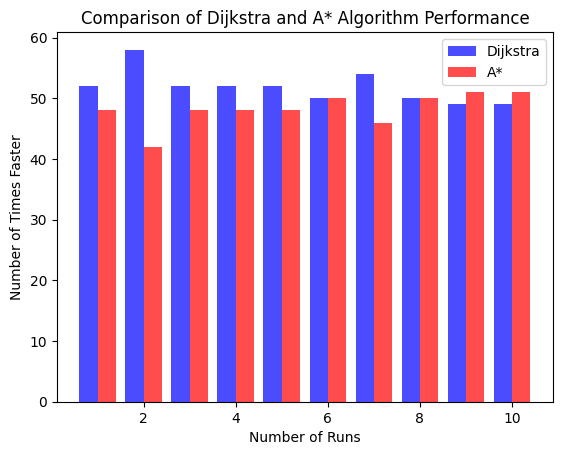

In [6]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np
def compare(G, h):
    dijkstra_time = 0
    a_star_time = 0
    dijkstra_faster_count = 0
    a_star_faster_count = 0
    G = create_random_complete_graph(10, 10)
    h = random_h(G)
    trials = 0
    while trials < 100:
        try:
            start = time.time()
            a_star(G, 0, 9, h)
            end = time.time()
            a_star_time=end-start
            
            start = time.time()
            dijkstra(G, 0)
            end = time.time()
            dijkstra_time=end-start
            
            if a_star_time < dijkstra_time:
                a_star_faster_count += 1
                trials += 1
            elif a_star_time == dijkstra_time:
                continue
            else:
                dijkstra_faster_count += 1
                trials += 1
        except Exception as e:
            print("A_star error:", e)
            G = create_random_complete_graph(10, 10)
            h = random_h(G)
    return (dijkstra_faster_count, a_star_faster_count)
    # plt.bar(['Dijkstra', 'A*'], [dijkstra_faster_count, a_star_faster_count])
    # plt.ylabel('Number of Times Faster')
    # plt.title('Comparison of Dijkstra and A* Algorithm Performance')
    # plt.show()

def compare_100_times():
    dijkstra_counts = []
    a_star_counts = []
    runs = []

    for i in range(10):
        G = create_random_complete_graph(10, 10)
        h = random_h(G)
        dijkstra_faster_count, a_star_faster_count = compare(G, h)
        dijkstra_counts.append(dijkstra_faster_count)
        a_star_counts.append(a_star_faster_count)
        runs.append(i+1)

    runs_np = np.array(runs)
    dijkstra_counts_np = np.array(dijkstra_counts)
    a_star_counts_np = np.array(a_star_counts)

    plt.bar(runs_np - 0.2, dijkstra_counts_np, width=0.4, label='Dijkstra', color='blue', alpha=0.7)
    plt.bar(runs_np + 0.2, a_star_counts_np, width=0.4, label='A*', color='red', alpha=0.7)
    plt.xlabel('Number of Runs')
    plt.ylabel('Number of Times Faster')
    plt.title('Comparison of Dijkstra and A* Algorithm Performance')
    plt.legend()
    plt.show()

compare_100_times()

#run compare 100 times and plot a line grap